In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from IPython.display import clear_output
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [26]:
blob_centers = np.array([[1, 1], [2, 1.5], [0, 1.8], [1.3, 2.4]])
blob_std = np.array([0.2, 0.2, 0.2, 0.2])

X, y = make_blobs(n_samples = 200, centers = blob_centers, cluster_std = blob_std)

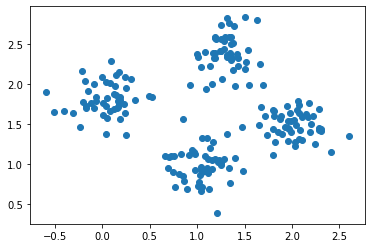

In [27]:
plt.scatter(X[:, 0], X[:, 1])

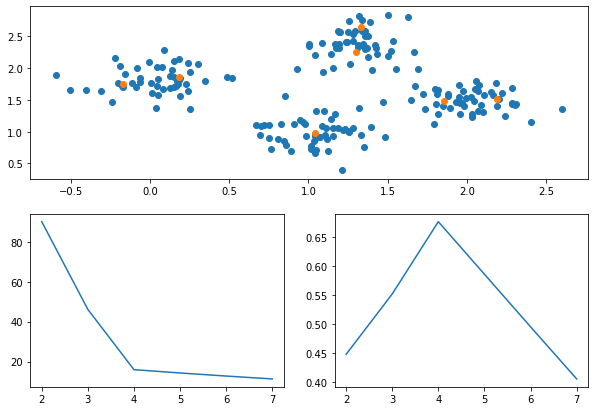

In [48]:
models = []
n_clusters = []
silhouette_coef = []
silhouette_scores = []
inertia = []

for k in (2, 3, 4, 5, 6, 7):
    fig = plt.figure(figsize = (10, 7))
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    models.append(kmeans)
    n_clusters.append(k)
    inertia.append(kmeans.inertia_)
    silhouette_coef.append(silhouette_score(X, kmeans.labels_))
    silhouette_scores.append(silhouette_samples(X, kmeans.labels_))
    
    clear_output(wait = True)
    axs = fig.add_subplot(2, 1, 1)
    axs.scatter(X[:, 0], X[:, 1])
    axs.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1])
    axs = fig.add_subplot(2, 2, 3)
    axs.plot(n_clusters, inertia)
    axs = fig.add_subplot(2, 2, 4)
    axs.plot(n_clusters, silhouette_coef)
    plt.show()
    plt.pause(1)

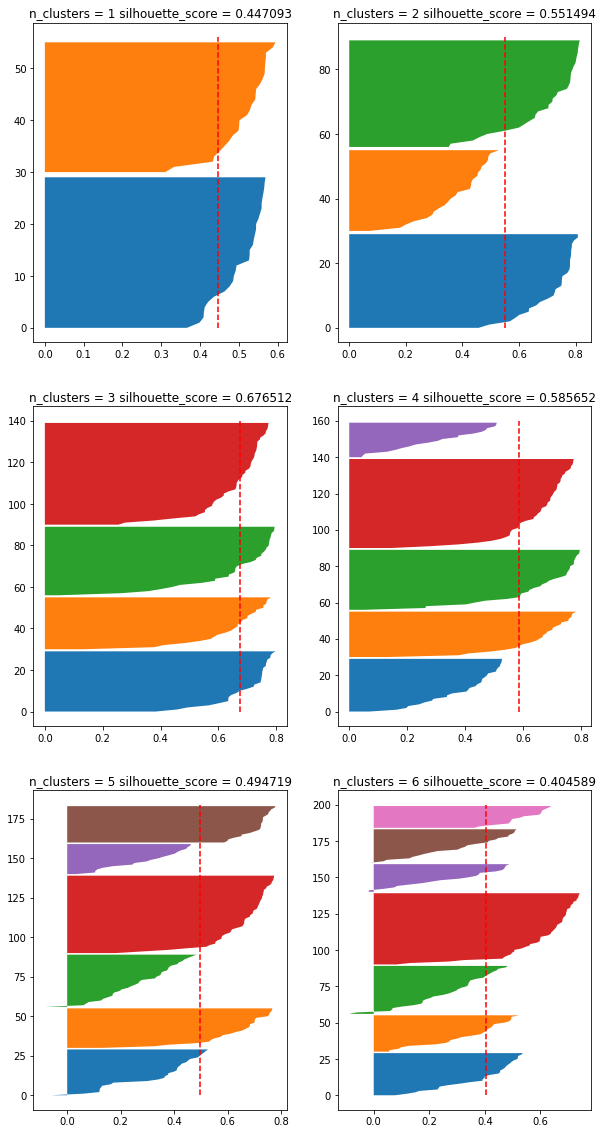

In [65]:
plt.figure(figsize = (10, 20))

for i in n_clusters:
    plt.subplot(3, 2, i-1)
    pos = 0
    for k in range(i):
        coef = silhouette_scores[i-2][kmeans.labels_ == k]
        coef.sort()
        
        plt.fill_betweenx(np.arange(pos, pos+len(coef)), 0, coef)
        pos += len(coef)
    plt.plot([silhouette_scores[i-2].mean(), silhouette_scores[i-2].mean()], [0, pos], 'r--')
    plt.title('n_clusters = %d silhouette_score = %f'%(k, silhouette_scores[i-2].mean()))